## Import necessary libraries

In [1]:
# import panda, numpy for data alanysis and numerical functions
import pandas as pd
import numpy as np

# Fpr Vizalization
import seaborn as sns
import matplotlib.pyplot as plt

# additional configuration to handle warnings
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read csv file
df = pd.read_csv('day.csv')

## Exploring

In [3]:
# read frist 5 rows of dataframe
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# check shape of dataframe
df.shape

(730, 16)

In [5]:
# info about dateset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Preparing data

#### Handle Missing values

In [6]:
# Handle Missing values
# It is obvious that there is no null value as non-null value count is same as total count of records.
# just to cross check let's re-verify null count
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Remove unwant column

In [7]:
# Removing `registered` and `casual` field as they are not feature of datasets
# Also, it describe the target variable cnt in a very trivial way target = casual + registered,
# which leads to data redundancy.
df1 = df.drop(['registered','casual'], axis=1)
df1.shape # check shape

(730, 14)

- `instant` -> just a row number so it can be removed
- `dteday` -> can be removed as `year`, `weekday`, `holiday` and `month` are already present as column. 

- one more column can be derived from date to indicate how old the business is.

In [8]:
# Droping instant column as it is index column
# Dropping dteday as we have already have month and weekday columns 
df1.drop(['instant','dteday'], axis = 1, inplace = True)

In [9]:
df1.shape

(730, 12)

In [10]:
# Read first 3 row from dataframe 
df1.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349


In [11]:
# check the datatypes 
df1.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [12]:
# check the dimensions 
df1.ndim

2

In [13]:
df1.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [14]:
# renaming few columns for better readibility

df1.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)
df1.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

In [15]:
# check value for season in dataframe
# season : (1:spring, 2:summer, 3:fall, 4:winter)
df1.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [16]:
# weathersit : 
# - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
df1.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [17]:
# check number of unique values in all columns
df1.nunique()

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
cnt           695
dtype: int64

In [18]:
# check correlation
df1.corr()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
year,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
month,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


In [19]:
df1.describe()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [20]:
# Encoding/mapping for season, month, weekday and weathersit
df1.season = df1.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df1.month = df1.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df1.weekday = df1.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df1.weathersit = df1.weathersit.map({1:'clear',2:'misty',3:'light_snow_rain',4:'heavy_snow_rain'})


In [21]:
df1.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


#### Outliners

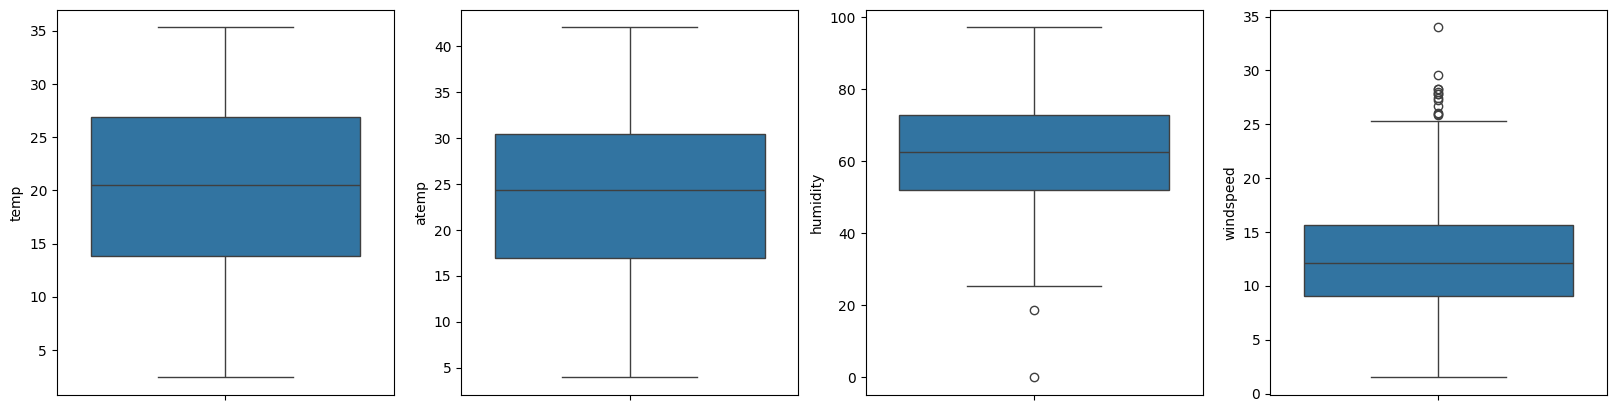

In [22]:
 # Draw box plots for indepent variables with continuous values to see outliers
cols = ['temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize=(20,5))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df1)
    i+=1

# These plots don't have any outliers to be handled.

In [23]:
# create seperate list for numerical and categorical
num_cols=["temp","atemp","humidity","windspeed","cnt"] 
cat_cols=["season","year", "month", "holiday","weekday", "workingday", "weathersit"]

In [24]:
# yes/No variables 
# holiday, workingday
df1.workingday.value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

## EDA

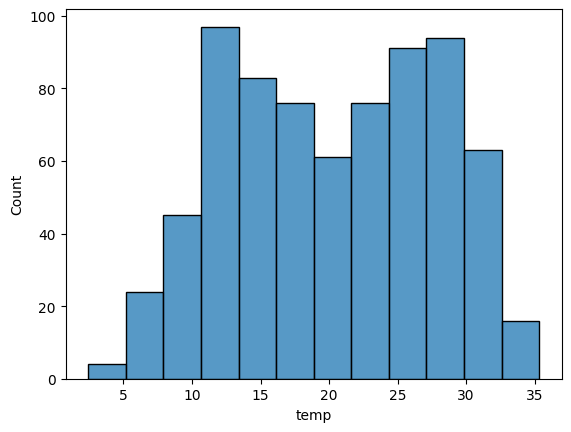

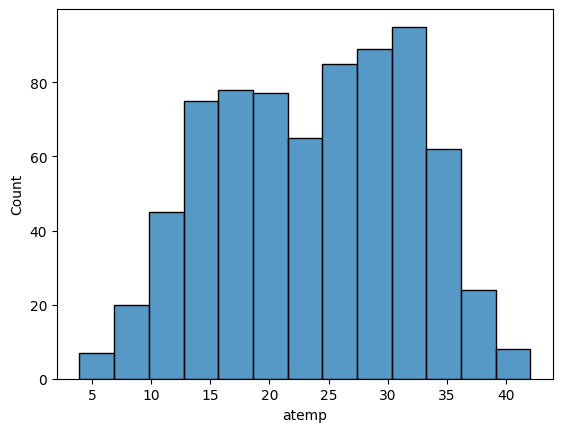

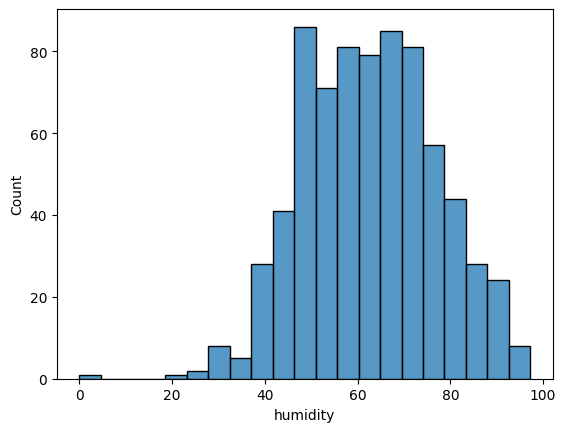

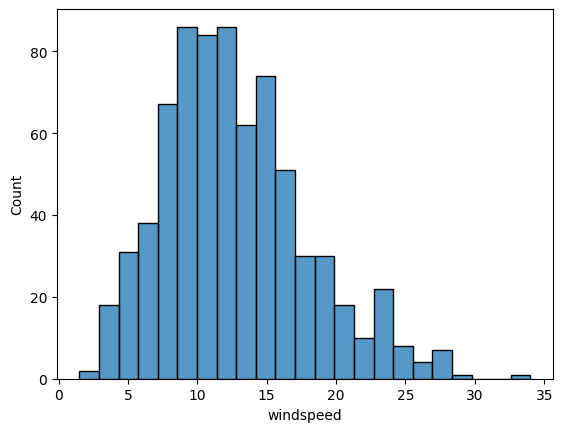

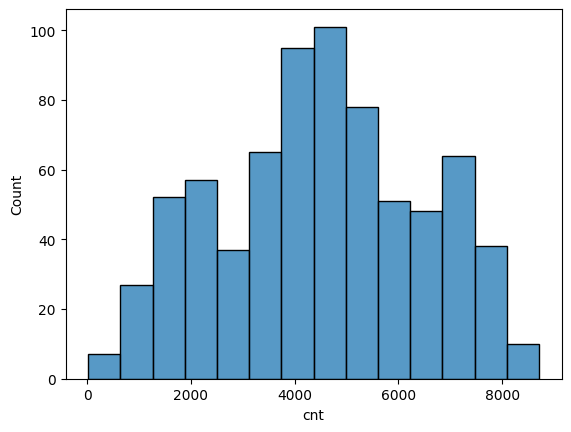

In [25]:
# Univariate Analysis 
for i in num_cols: 
    sns.histplot(x=df1[i])
    plt.show() 

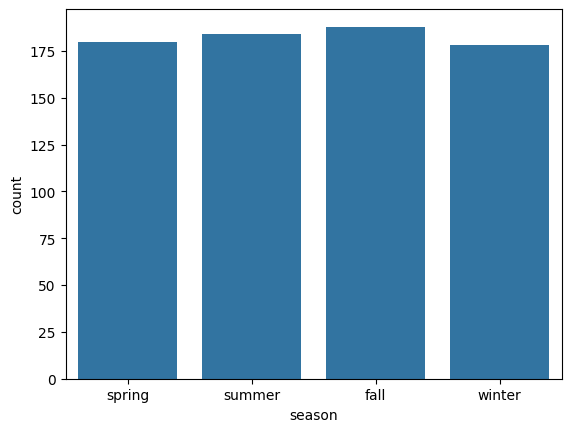

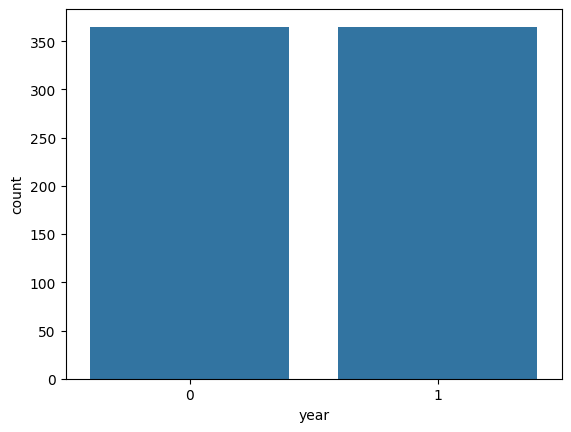

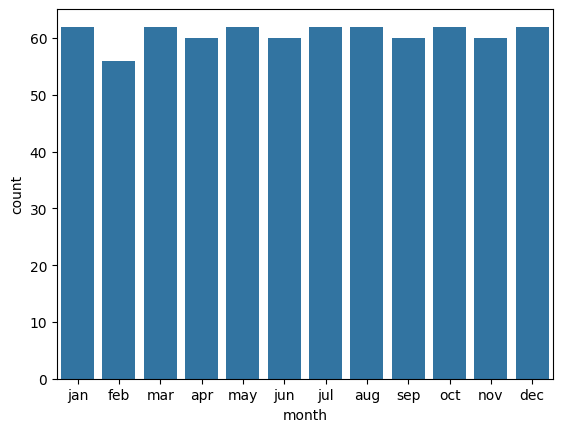

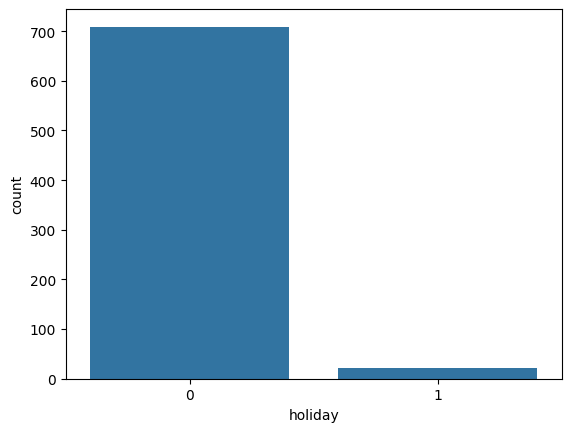

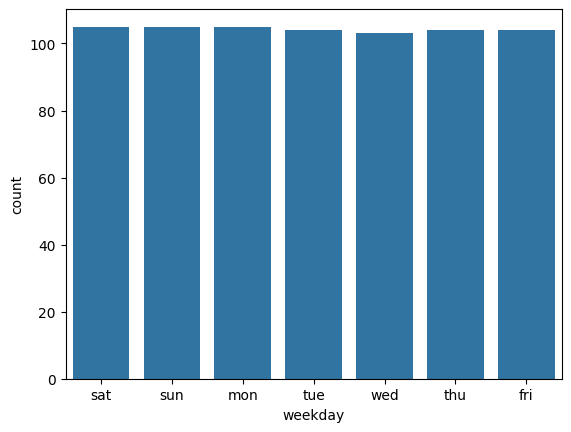

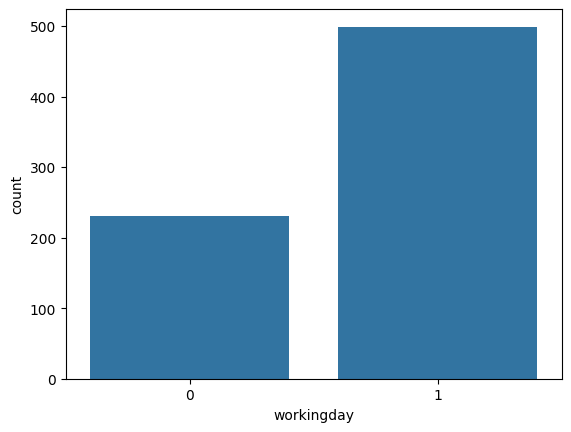

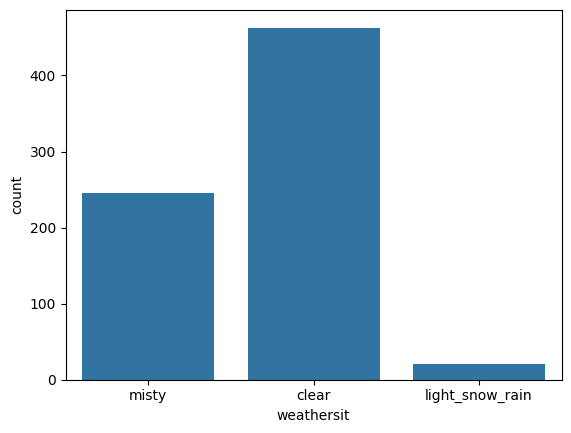

In [26]:
for i in cat_cols: 
    sns.countplot(x=df1[i]) 
    plt.show()

<Figure size 1500x3000 with 0 Axes>

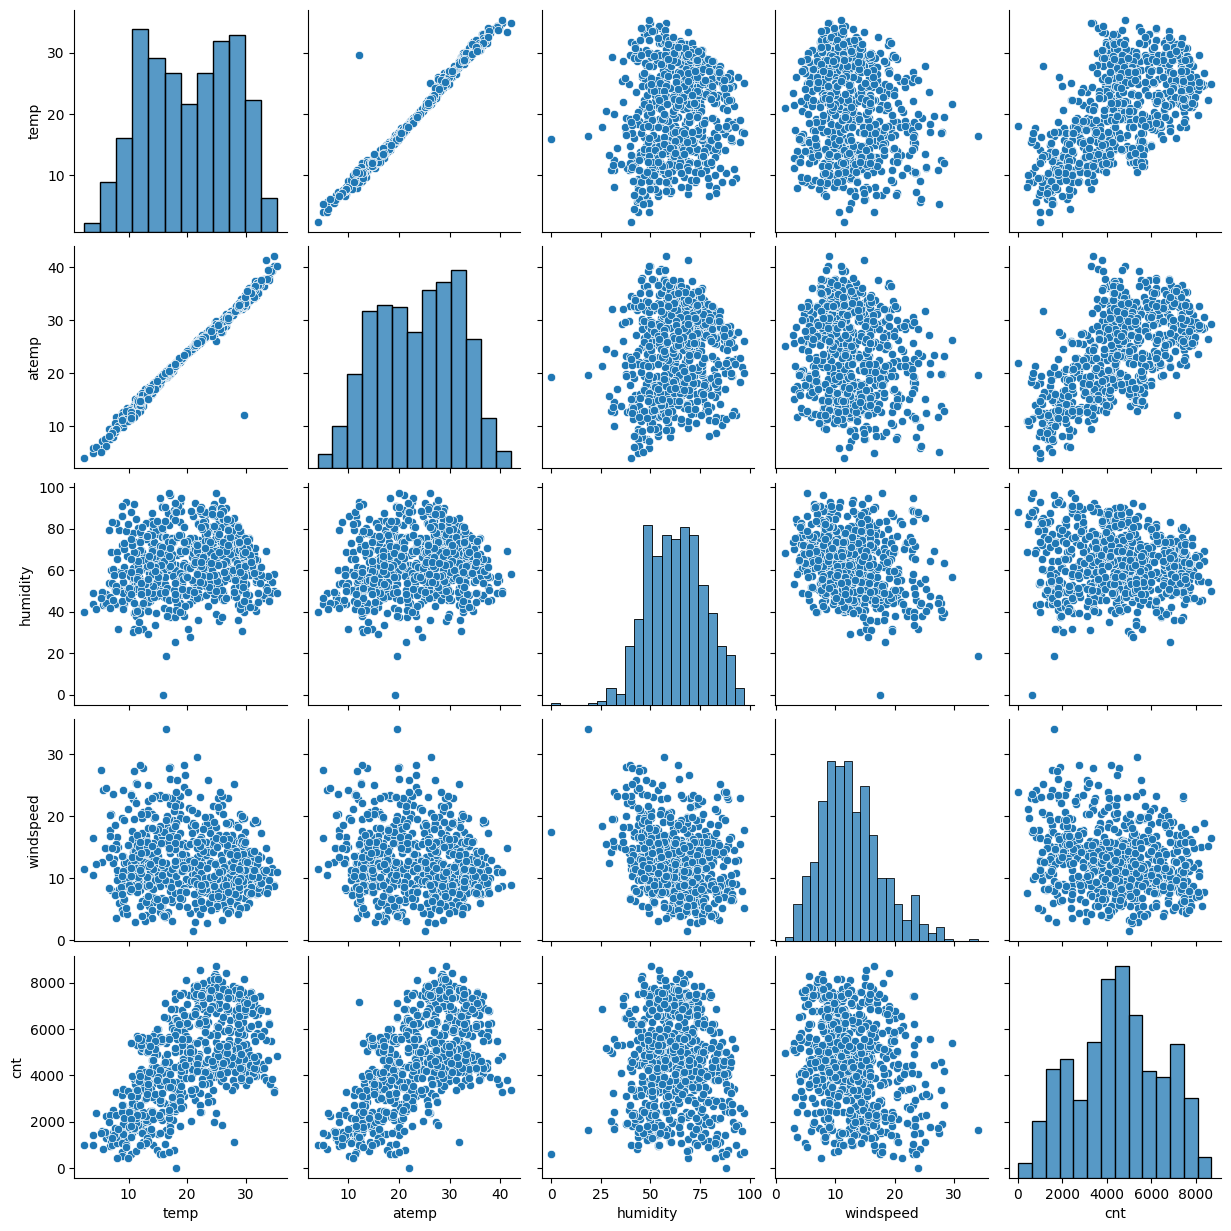

In [27]:
# Draw pair Plots to check the linear relationship
plt.figure(figsize = (15,30))
sns.pairplot(data=df1,vars=num_cols)
plt.show()

- There is a linear relationship between temp and atemp (`feeling_temp`) and both are highly corelated 
- temp and atemp (`feeling_temp`) has highest corelation with the target vairable `cnt` and has a linear relation

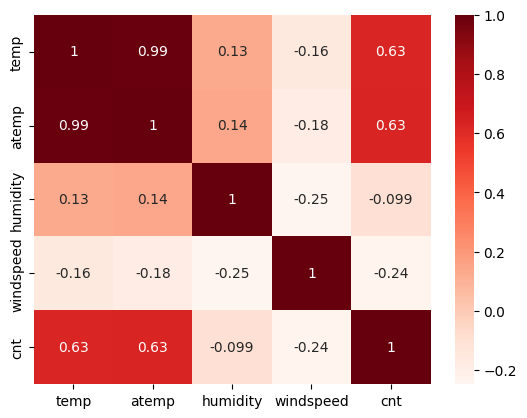

In [28]:
# Checking continuous variables relationship with each other
sns.heatmap(df1[num_cols].corr(), cmap='Reds', annot = True)
plt.show()

# temp and atemp (`feeling_temp`) has correlation more than .99, which is almost cose to 1 (highly correlated). 

- since, there is linear relationship between temp and atemp (`feeling_temp`). Both of the parameters cannot be used in the model due to multicolinearity.

- After viewing above correlation map, `temp`, `atemp` (feeling_temp) and `year` seems to be highly correlated.
- cnt is inversely corelated with `weathersit` and `windspeed`

#### Analysing Categorical Variabels with target variables

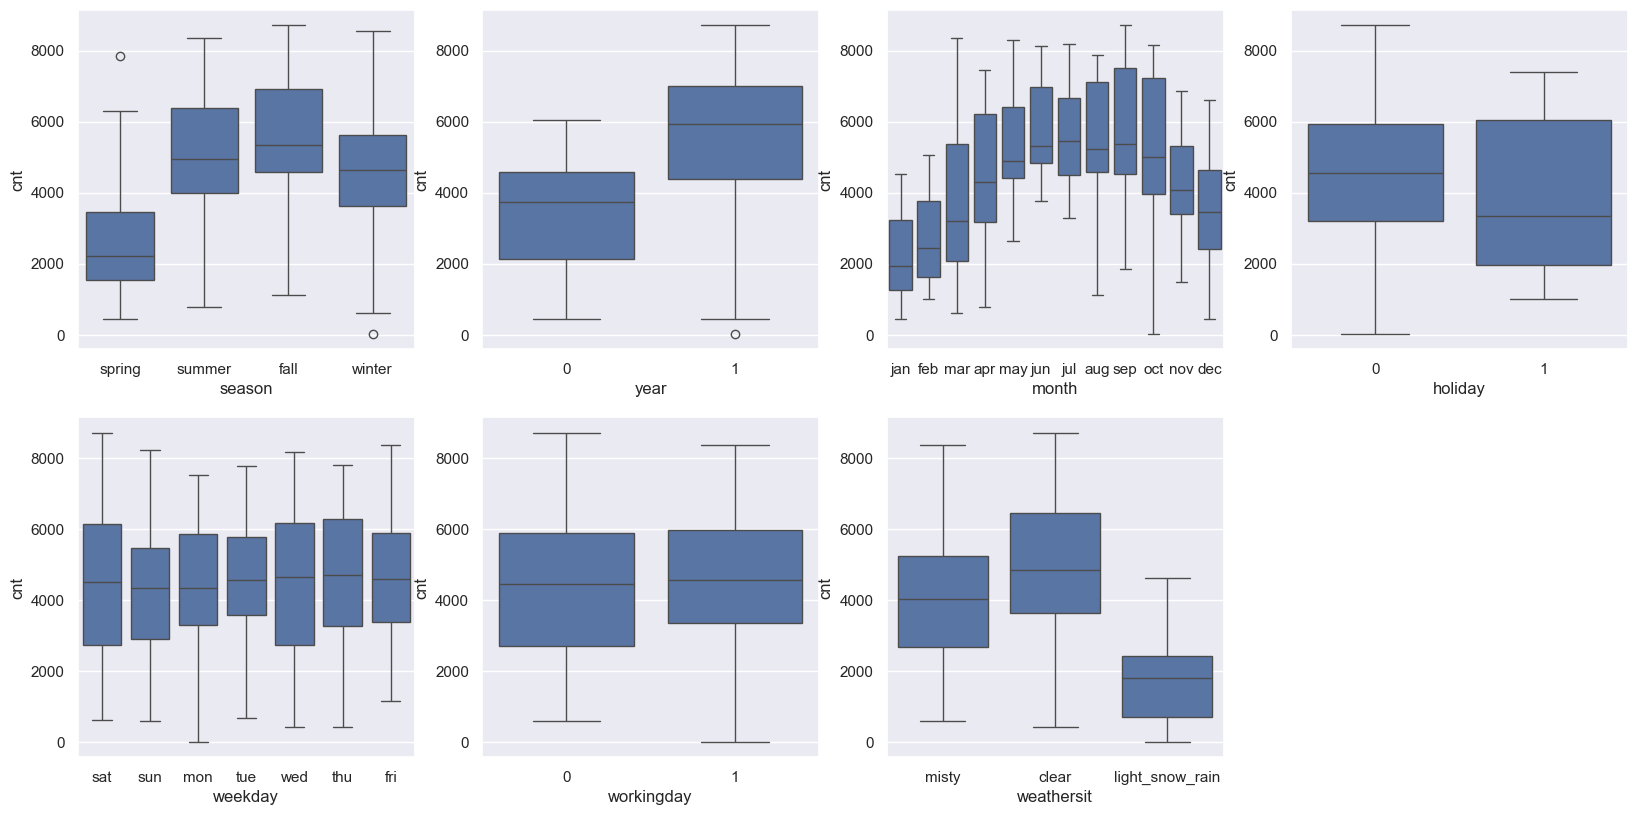

In [29]:
# Boxplot for categorical variables to see demands
# - instant: record index
# 	- dteday : date
# 	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
# 	- yr : year (0: 2018, 1:2019)
# 	- mnth : month ( 1 to 12)
# 	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
# 	- weekday : day of the week
# 	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
# 	+ weathersit : 
# 		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
# 	- temp : temperature in Celsius
# 	- atemp: feeling temperature in Celsius
# 	- hum: humidity
# 	- windspeed: wind speed
# 	- casual: count of casual users
# 	- registered: count of registered users
# 	- cnt: count of total rental bikes including both casual and registered

plt.figure(figsize=(20, 15))
sns.set_theme(style="darkgrid")
for i in enumerate(cat_cols):
    plt.subplot(3,4,i[0]+1)
    sns.boxplot(data=df1, x=i[1], y='cnt', )
plt.show()

- season 3 (fall) has the highest demand of the bikes
- demand for rental bikes in 2019 has increased as compared to 2018. 
- On Monthly basis demand of rental bikes shows continus increase till the month of june, while in month of July and August the is slight fall in demand of rental bikes. September is having highest demand.
- Post september month, rental bikes demand has gradully decreases.
- On holidays, demand of rental bike is lesser.
- Clear weather situation: (Clear, few clouds, Partly cloudy, Partly cloudy) has highest demand as compared to other weather conditions.
- 6th day (Friday) of the week is having more demand for rental bikes.


In [30]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,2)
    ax = sns.barplot(x=column,y='cnt',data=df1, hue='year',palette='tab10')
    ax.set(xlabel='season', ylabel='cnt')
    ax.set_title('SEASON vs CNT')
    plt.show()

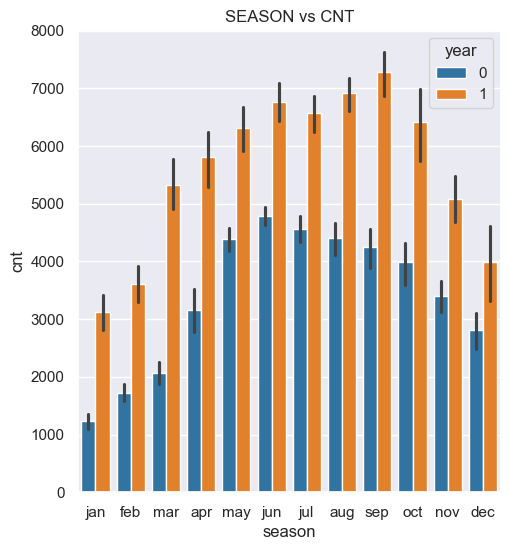

In [31]:
# plotting visualization for season column
plot_cat_columns('month')

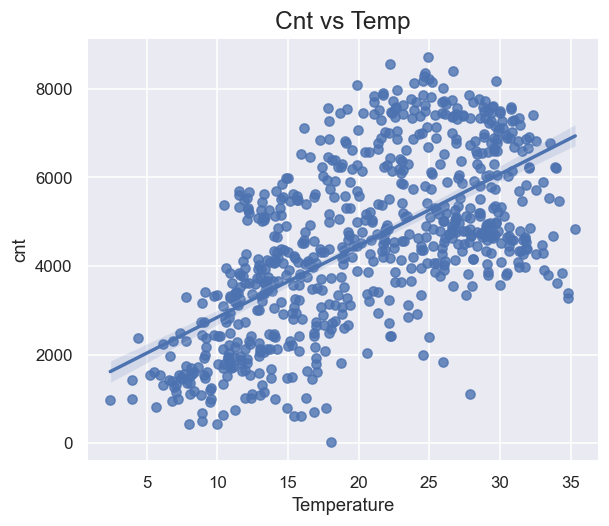

In [32]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=df1,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

# demand of bike increase with temp
# cnt is linearly increasing with increase in temp

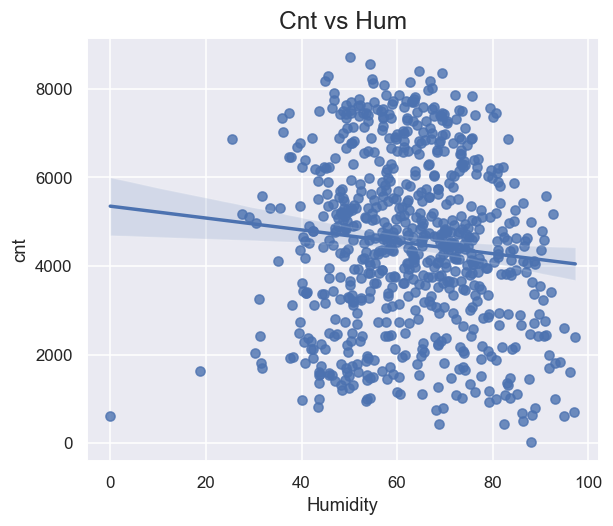

In [33]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=df1,y="cnt",x="humidity")
plt.xlabel("Humidity")
plt.show()
# cnt is inversly related to humidity. With increase in humidity cnt decreases.

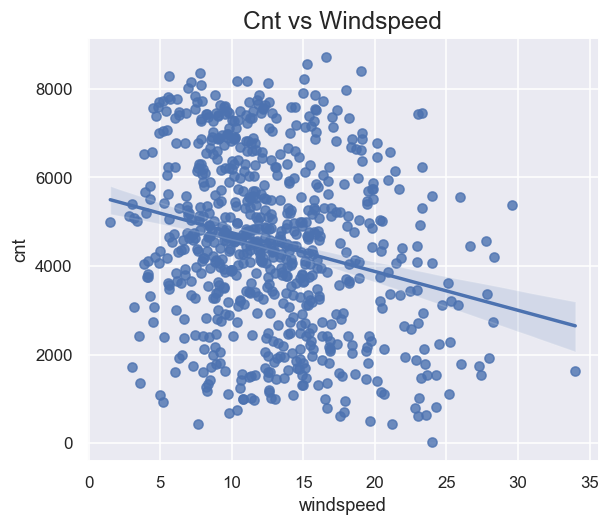

In [34]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=df1,y="cnt",x="windspeed")
plt.show()

# windspeed and cnt has inverse relation. with increase in windspeed cnt decreases


## Data Preparation for Linear Regression

#### Pre-processing steps

In [35]:
df1[cat_cols].nunique()

season         4
year           2
month         12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [37]:
# Creade dummy variable creation for month
months_df=pd.get_dummies(df1.month,drop_first=True,dtype=int)
months_df.shape

(730, 11)

In [38]:
months_df.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [39]:
df1.workingday.unique()

array([0, 1])

In [40]:
# Create Dummy variable creation for weekday, weathersit, season and holiday
weekdays_df=pd.get_dummies(df1.weekday,drop_first=True ,dtype=int)
weathersit_df=pd.get_dummies(df1.weathersit,drop_first=True,dtype=int)
seasons_df=pd.get_dummies(df1.season,drop_first=True,dtype=int)

In [41]:
df1.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [42]:
# Merge dataframe with dummy variable
# df2 = pd.concat([df1, months_df,weekdays_df, weathersit_df, seasons_df, holiday_df], axis=1)
# df2 = pd.concat([df1, months_df,weekdays_df, weathersit_df, seasons_df], axis=1)
df2 = pd.concat([df1,months_df, weathersit_df, seasons_df, weekdays_df], axis=1)

In [43]:
df2.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,misty,spring,summer,winter,mon,sat,sun,thu,tue,wed
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,...,1,1,0,0,0,1,0,0,0,0
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,...,1,1,0,0,0,0,1,0,0,0
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,...,0,1,0,0,1,0,0,0,0,0
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,...,0,1,0,0,0,0,0,0,1,0
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,...,0,1,0,0,0,0,0,0,0,1


In [44]:
df2.shape

(730, 34)

In [45]:
# dropping unnecessary columns as we have already created dummy variable out of it.

# df2.drop(['season','month','weekday','weathersit','holiday'], axis = 1, inplace = True)
# df2.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
df2.drop(['season','month','weathersit','weekday'], axis = 1, inplace = True)
df2.shape

(730, 30)

In [46]:
# check for first 5 row dataframe
df2.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,misty,spring,summer,winter,mon,sat,sun,thu,tue,wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,1,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,1,1,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,1,0,0,0,0,0,0,0,1


In [47]:
# check the column info 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   humidity         730 non-null    float64
 6   windspeed        730 non-null    float64
 7   cnt              730 non-null    int64  
 8   aug              730 non-null    int64  
 9   dec              730 non-null    int64  
 10  feb              730 non-null    int64  
 11  jan              730 non-null    int64  
 12  jul              730 non-null    int64  
 13  jun              730 non-null    int64  
 14  mar              730 non-null    int64  
 15  may              730 non-null    int64  
 16  nov              730 non-null    int64  
 17  oct             

In [48]:
df2.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar',
       'may', 'nov', 'oct', 'sep', 'light_snow_rain', 'misty', 'spring',
       'summer', 'winter', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

## Split the Dataset into Training and Testing Sets

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
# split the dataframe into Train and Test
df_train, df_test = train_test_split(df2, train_size = 0.7, random_state = 100)

In [51]:
# check the shape of training and test datatset
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


## Scaling

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate an object of MinMaxScaler
scaler = MinMaxScaler()

In [53]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,misty,spring,summer,winter,mon,sat,sun,thu,tue,wed
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,1,0,0,0,1,0,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,1,0,0,1,0,0,0,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,1,0,1,0,0,0,0,0,0,0


In [54]:
# summary dataset distibution 
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,misty,spring,summer,winter,mon,sat,sun,thu,tue,wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.108257,23.500287,63.123710,12.834912,4485.337255,0.096078,0.084314,...,0.345098,0.243137,0.247059,0.247059,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,7.431626,8.090963,14.153170,5.292031,1950.666077,0.294988,0.278131,...,0.475867,0.429398,0.431725,0.431725,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.277923,24.131150,63.437500,12.083182,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
# create alist of numeric variables
# Apply scaler to all the columns except the 'categorical' and 'dummy' variables
num_vars = ['temp','atemp','humidity','windspeed','cnt']

# fit and transform on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
# df_test[num_vars] = scaler.transform(df_test[num_vars]) #As test data is unseen data we can't fit on it


In [56]:
# verify first 5 Row after appying scaling.
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,misty,spring,summer,winter,mon,sat,sun,thu,tue,wed
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,1,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,1,0,0,1,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,1,0,1,0,0,0,0,0,0,0


In [57]:
# summary dataset distibution 
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,misty,spring,summer,winter,mon,sat,sun,thu,tue,wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.345098,0.243137,0.247059,0.247059,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.475867,0.429398,0.431725,0.431725,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


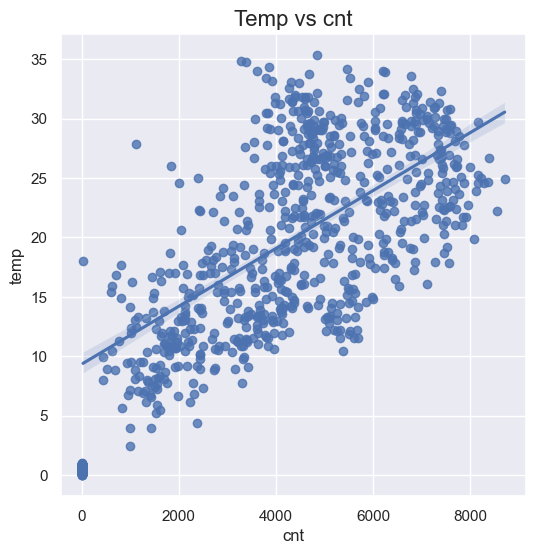

In [58]:
# Visualizing one of the correlation to see the trends via Scatter plot just to verify shape
plt.figure(figsize=[6,6])
plt.scatter(y=df_train.temp, x=df_train.cnt)
plt.title("Temp vs cnt",fontsize=16)
sns.regplot(data=df1,y="temp",x="cnt")
plt.show()

- Visualization confirms the positive correlation between temp and cnt.

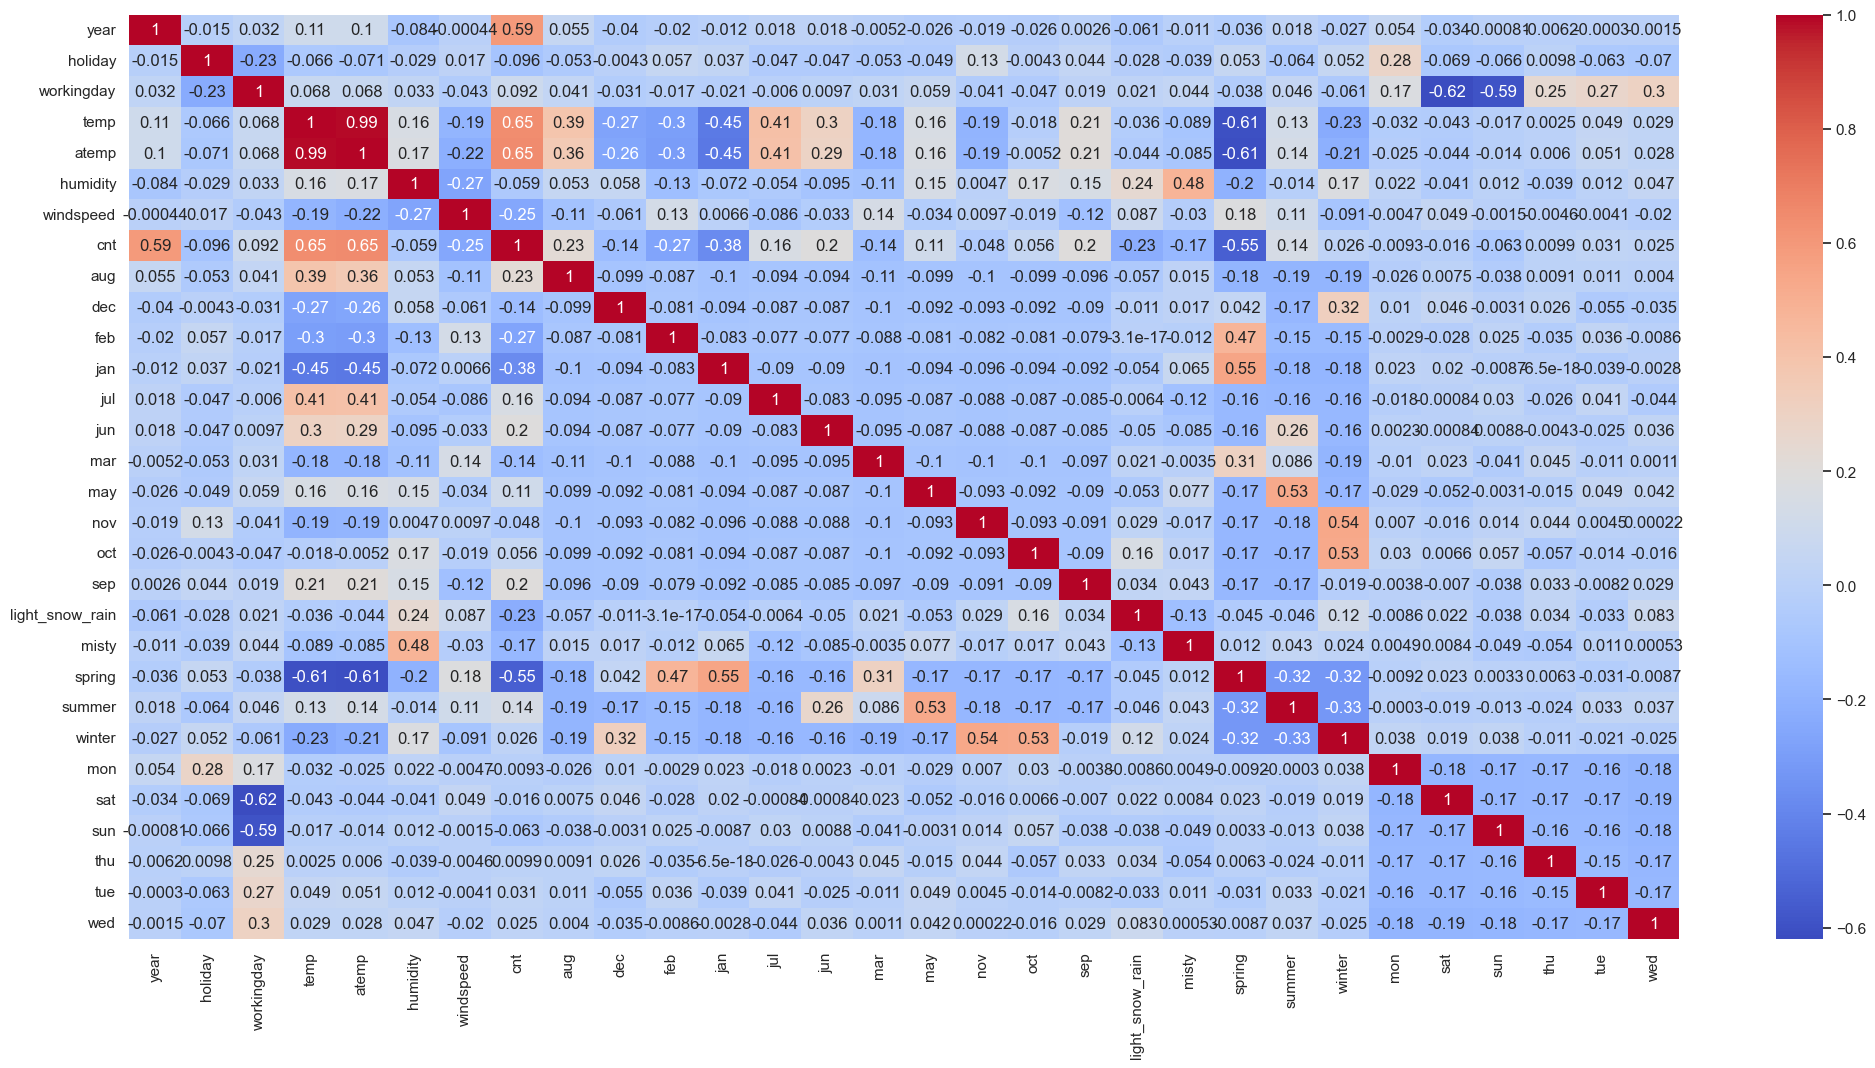

In [59]:
# Plot a heatmap for correlation between training data
plt.figure(figsize=(25,12))
sns.heatmap(df_train.corr(),cmap="coolwarm",annot=True)
plt.show()

In [60]:
# create X_train and y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [61]:
# X_train should have all columns other then 'cnt'
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,aug,dec,feb,...,misty,spring,summer,winter,mon,sat,sun,thu,tue,wed
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,1,1,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,...,0,1,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,...,1,0,1,0,0,1,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [62]:
# y_train should have only 'cnt'
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

## Manual creation of model
- forward selection technique

#### Model 1

In [63]:
import statsmodels.api as sm

In [64]:
# Add a constant
X_train_sm = sm.add_constant(X_train['temp'])

In [65]:
# create first model
lr = sm.OLS(y_train,X_train_sm)

# fit
lr_model = lr.fit()

# parameter of linear model
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [66]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           2.46e-61
Time:                        20:31:51   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
df2.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar',
       'may', 'nov', 'oct', 'sep', 'light_snow_rain', 'misty', 'spring',
       'summer', 'winter', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

#### Model 2

In [68]:
# Add another variable : workingday
X_train_sm = X_train[['temp','workingday']]
X_train_sm = sm.add_constant(X_train_sm)

# create first model
lr2 = sm.OLS(y_train,X_train_sm)

# fit
lr_model2 = lr2.fit()

# parameter of linear model
lr_model2.params

const         0.155172
temp          0.637674
workingday    0.023086
dtype: float64

In [69]:
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     182.4
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           2.15e-60
Time:                        20:31:51   Log-Likelihood:                 177.10
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     507   BIC:                            -335.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1552      0.022      7.081      0.000       0.112       0.198
temp           0.6377      0.034     18.904      0.000       0.571       0.704
workingday     0.0231      0.016      1.419      0.157      -0.009       0.055
==============================================================================
Omnibus:                        5.293   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                4.023
Skew:                           0.095   Prob(JB):                        0.134
Kurtosis:                       2.609   Cond. No.                         6.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model 3

In [70]:
# Add another variable: year
X_train_sm = X_train[['temp','workingday','year']]
X_train_sm = sm.add_constant(X_train_sm)

# create first model
lr3 = sm.OLS(y_train,X_train_sm)

# fit
lr_model3 = lr3.fit()

# parameter of linear model
lr_model3.params

# summary
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     380.3
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          3.26e-129
Time:                        20:31:51   Log-Likelihood:                 339.82
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     506   BIC:                            -654.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0693      0.016      4.212      0.000       0.037       0.102
temp           0.5820      0.025     23.579      0.000       0.533       0.630
workingday     0.0169      0.012      1.426      0.154      -0.006       0.040
year           0.2363      0.011     21.256      0.000       0.215       0.258
==============================================================================
Omnibus:                       29.278   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.976
Skew:                          -0.465   Prob(JB):                     1.27e-09
Kurtosis:                       4.031   Cond. No.                         7.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model 4

In [71]:
# Add another variable : summer
X_train_sm = X_train[['temp','workingday','year','summer']]
X_train_sm = sm.add_constant(X_train_sm)

# create first model
lr4 = sm.OLS(y_train,X_train_sm)

# fit
lr_model4 = lr4.fit()

# parameter of linear model
lr_model4.params

# summary
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     288.8
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          5.38e-129
Time:                        20:31:51   Log-Likelihood:                 342.40
No. Observations:                 510   AIC:                            -674.8
Df Residuals:                     505   BIC:                            -653.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0665      0.016      4.048      0.000       0.034       0.099
temp           0.5751      0.025     23.220      0.000       0.526       0.624
workingday     0.0159      0.012      1.345      0.179      -0.007       0.039
year           0.2363      0.011     21.334      0.000       0.214       0.258
summer         0.0292      0.013      2.267      0.024       0.004       0.054
==============================================================================
Omnibus:                       29.513   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.878
Skew:                          -0.447   Prob(JB):                     2.97e-10
Kurtosis:                       4.126   Cond. No.                         7.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model 5

In [72]:
# Add another variable : winter
X_train_sm = X_train[['temp','workingday','year','summer', "winter"]]
X_train_sm = sm.add_constant(X_train_sm)

# create first model
lr5 = sm.OLS(y_train,X_train_sm)

# fit
lr_model5 = lr5.fit()

# parameter of linear model
lr_model5.params

# summary
lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     288.3
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.85e-145
Time:                        20:31:52   Log-Likelihood:                 383.35
No. Observations:                 510   AIC:                            -754.7
Df Residuals:                     504   BIC:                            -729.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0018      0.017      0.106      0.916      -0.031       0.035
temp           0.6194      0.023     26.512      0.000       0.573       0.665
workingday     0.0195      0.011      1.792      0.074      -0.002       0.041
year           0.2362      0.010     23.091      0.000       0.216       0.256
summer         0.0653      0.012      5.224      0.000       0.041       0.090
winter         0.1195      0.013      9.370      0.000       0.094       0.145
==============================================================================
Omnibus:                      102.011   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              301.609
Skew:                          -0.946   Prob(JB):                     3.21e-66
Kurtosis:                       6.258   Cond. No.                         8.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model 6

In [73]:
# Add All variables 
X_train_sm = sm.add_constant(X_train)

# create first model
lr6 = sm.OLS(y_train,X_train_sm)

# fit
lr_model6 = lr6.fit()

# parameter of linear model
lr_model6.params

# summary
lr_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.81e-180
Time:                        20:31:52   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2433      0.035      6.887      0.000       0.174       0.313
year                0.2325      0.008     28.794      0.000       0.217       0.248
holiday             0.0109      0.024      0.451      0.652      -0.037       0.058
workingday          0.0963      0.012      7.835      0.000       0.072       0.120
temp                0.3880      0.142      2.727      0.007       0.108       0.668
atemp               0.0590      0.138      0.426      0.670      -0.213       0.331
humidity           -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed          -0.1836      0.026     -6.962      0.000      -0.235      -0.132
aug                 0.0223      0.034      0.657      0.511      -0.044       0.089
dec                -0.0443      0.034     -1.316      0.189      -0.110       0.022
feb                -0.0323      0.033     -0.980      0.327      -0.097       0.032
jan                -0.0631      0.034     -1.876      0.061      -0.129       0.003
jul                -0.0327      0.035     -0.931      0.352      -0.102       0.036
jun                 0.0060      0.025      0.241      0.810      -0.043       0.055
mar                 0.0016      0.025      0.063      0.950      -0.047       0.050
may                 0.0255      0.021      1.208      0.228      -0.016       0.067
nov                -0.0398      0.036     -1.093      0.275      -0.111       0.032
oct                 0.0077      0.036      0.215      0.830      -0.063       0.078
sep                 0.0868      0.032      2.711      0.007       0.024       0.150
light_snow_rain    -0.2550      0.026     -9.631      0.000      -0.307      -0.203
misty              -0.0595      0.010     -5.701      0.000      -0.080      -0.039
spring             -0.0454      0.030     -1.511      0.131      -0.104       0.014
summer              0.0424      0.026      1.617      0.107      -0.009       0.094
winter              0.1071      0.028      3.826      0.000       0.052       0.162
mon                -0.0216      0.015     -1.401      0.162      -0.052       0.009
sat                 0.0952      0.014      6.910      0.000       0.068       0.122
sun                 0.0410      0.014      2.929      0.004       0.013       0.068
thu                -0.0097      0.016     -0.623      0.534      -0.040       0.021
tue                -0.0184      0.016     -1.184      0.237      -0.049       0.012
wed                -0.0059      0.015     -0.394      0.694      -0.035       0.023
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.656
Skew:                          -0.805   Prob(JB):                     1.11

In [74]:
# significance (p-value)
# VIF

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_sm.columns

vif_data["VIF"] = [variance_inflation_factor(X_train_sm.values,i) 
                   for i in range(len(X_train_sm.columns))]
vif_data["VIF"] = round(vif_data["VIF"],2)
vif_data = vif_data.sort_values(by='VIF', ascending= False)
vif_data

,Feature,VIF
3,workingday,inf
2,holiday,inf
25,sat,inf
26,sun,inf
4,temp,66.90
5,atemp,56.03
21,spring,10.77
23,winter,9.46
22,summer,8.29
16,nov,6.79


In [76]:
# Dropping highly correlated variables and insignificant variables
X_remaining_col = X_train.drop('mar', axis=1)

In [77]:
# Build a fitted model
X_train_lm = sm.add_constant(X_remaining_col)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.3
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.75e-181
Time:                        20:31:53   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     482   BIC:                            -879.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2441      0.033     

In [78]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
25,sun,inf
24,sat,inf
4,temp,66.84
5,atemp,55.99
20,spring,9.66
22,winter,9.13
21,summer,7.99
8,aug,5.74


In [79]:
# Dropping highly correlated variables and insignificant variables
X_remaining_col = X_train.drop(['mar','aug', 'atemp', 'jun', 'holiday','oct', 'thu', 'wed', 'sat', 'tue', 'may', 'workingday', 'spring'], axis=1)
# Build a fitted model
X_train_lm = sm.add_constant(X_remaining_col)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
lr_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.4
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.75e-188
Time:                        20:31:53   Log-Likelihood:                 516.11
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     493   BIC:                            -926.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2918      0.031      9.338      0.000       0.230       0.353
year                0.2315      0.008     28.675      0.000       0.216       0.247
temp                0.5081      0.031     16.226      0.000       0.447       0.570
humidity           -0.1552      0.038     -4.119      0.000      -0.229      -0.081
windspeed          -0.1968      0.026     -7.700      0.000      -0.247      -0.147
dec                -0.0489      0.018     -2.667      0.008      -0.085      -0.013
feb                -0.0530      0.021     -2.549      0.011      -0.094      -0.012
jan                -0.0776      0.021     -3.694      0.000      -0.119      -0.036
jul                -0.0411      0.018     -2.299      0.022      -0.076      -0.006
nov                -0.0487      0.019     -2.606      0.009      -0.085      -0.012
sep                 0.0793      0.016      4.902      0.000       0.048       0.111
light_snow_rain    -0.2500      0.026     -9.479      0.000      -0.302      -0.198
misty              -0.0551      0.010     -5.286      0.000      -0.076      -0.035
summer              0.0622      0.012      5.171      0.000       0.039       0.086
winter              0.1306      0.014      9.339      0.000       0.103       0.158
mon                -0.0248      0.011     -2.193      0.029      -0.047      -0.003
sun                -0.0475      0.012     -4.102      0.000      -0.070      -0.025
==============================================================================
Omnibus:                       87.991   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.052
Skew:                          -0.855   Prob(JB):                     4.08e-51
Kurtosis:                       5.828   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,62.21
2,temp,3.18
14,winter,2.32
7,jan,2.26
3,humidity,1.92
9,nov,1.76
6,feb,1.72
13,summer,1.71
5,dec,1.66
12,misty,1.56


Residual Analysis of the train data

In [81]:
y_train_cnt = lr_9.predict(X_train_lm)

Text(0.5, 0, 'Errors')

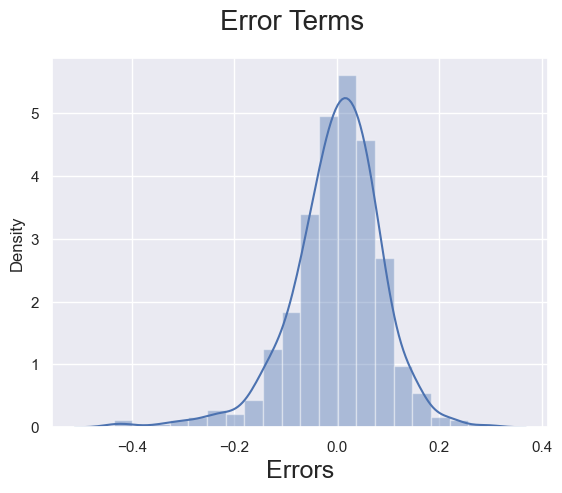

In [82]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

## Making Predictions Using the Final Model
#### Applying the scaling on the test sets

In [83]:
# Transform on test data
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [84]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,misty,spring,summer,winter,mon,sat,sun,thu,tue,wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.318182,0.254545,0.263636,0.236364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.466833,0.436599,0.441609,0.425817,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
# Divide into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [86]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)

In [87]:
# Creating X_test_m dataframe by dropping variables from X_test_m
X_test_m = X_test_m.drop(['mar','aug', 'atemp', 'jun', 'holiday','oct', 'thu', 'wed', 'sat', 'tue', 'may', 'workingday', 'spring'], axis = 1)

In [88]:
# Making predictions using the 9th model
y_pred_m = lr_9.predict(X_test_m)

In [89]:
from sklearn.metrics import r2_score

In [90]:
# evaluate
r2_score(y_true=y_test, y_pred=y_pred_m)

0.8195713466043724

- prediction score is close to 82% which is close to 84.6%. Thus, this model is able to generalise the test data.

### RFE
Recursive Feature Elimination

In [91]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

we have already divided test and train ealier so we will be using the same.

In [92]:
X_train.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep', 'light_snow_rain', 'misty', 'spring', 'summer',
       'winter', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [93]:
# Running RFE with the output number of variables equals to 10
lr_estimator = LinearRegression()

# Run RFE
selector = RFE(lr_estimator,n_features_to_select=15)

In [94]:
selector= selector.fit(X_train, y_train)
selector.support_

array([ True,  True,  True,  True, False,  True,  True, False, False,
       False, False,  True, False, False, False, False, False,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
       False, False])

In [95]:
# Columns selected by RFE and their weights
list(zip(X_train.columns,selector.support_,selector.ranking_))

[('year', np.True_, np.int64(1)),
 ('holiday', np.True_, np.int64(1)),
 ('workingday', np.True_, np.int64(1)),
 ('temp', np.True_, np.int64(1)),
 ('atemp', np.False_, np.int64(7)),
 ('humidity', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('aug', np.False_, np.int64(9)),
 ('dec', np.False_, np.int64(4)),
 ('feb', np.False_, np.int64(5)),
 ('jan', np.False_, np.int64(2)),
 ('jul', np.True_, np.int64(1)),
 ('jun', np.False_, np.int64(13)),
 ('mar', np.False_, np.int64(15)),
 ('may', np.False_, np.int64(6)),
 ('nov', np.False_, np.int64(3)),
 ('oct', np.False_, np.int64(11)),
 ('sep', np.True_, np.int64(1)),
 ('light_snow_rain', np.True_, np.int64(1)),
 ('misty', np.True_, np.int64(1)),
 ('spring', np.True_, np.int64(1)),
 ('summer', np.True_, np.int64(1)),
 ('winter', np.True_, np.int64(1)),
 ('mon', np.False_, np.int64(8)),
 ('sat', np.True_, np.int64(1)),
 ('sun', np.True_, np.int64(1)),
 ('thu', np.False_, np.int64(12)),
 ('tue', np.False_, np.int64(10)),
 ('wed', 

In [96]:
# Print name of selected column
selected_features = X_train.columns[selector.support_]
print(selected_features)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'jul',
       'sep', 'light_snow_rain', 'misty', 'spring', 'summer', 'winter', 'sat',
       'sun'],
      dtype='object')


In [97]:
# checking which columns has been rejected
X_train.columns[~selector.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'jun', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed'],
      dtype='object')

Building model using statsmodel, for detailed statistics

In [98]:
# Create X_train dataframe with RFE selected variables
X_train_rfe = X_train[selected_features]

In [99]:
 # Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [100]:
# Running the linear model
lm_rfe = sm.OLS(y_train, X_train_rfe).fit()

# Print summary of the Linear RFE model
# print(lm_rfe.summary())
lm_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.11e-191
Time:                        20:31:55   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1995      0.028      7.200      0.000       0.145       0.254
year                0.2298      0.008     28.647      0.000       0.214       0.246
holiday            -0.0184      0.021     -0.867      0.386      -0.060       0.023
workingday          0.0837      0.010      8.665      0.000       0.065       0.103
temp                0.5277      0.033     15.884      0.000       0.462       0.593
humidity           -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed          -0.1809      0.025     -7.118      0.000      -0.231      -0.131
jul                -0.0546      0.018     -3.019      0.003      -0.090      -0.019
sep                 0.0820      0.017      4.966      0.000       0.050       0.114
light_snow_rain    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
misty              -0.0563      0.010     -5.425      0.000      -0.077      -0.036
spring             -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer              0.0537      0.015      3.631      0.000       0.025       0.083
winter              0.0992      0.017      5.815      0.000       0.066       0.133
sat                 0.0937      0.012      8.040      0.000       0.071       0.117
sun                 0.0406      0.012      3.315      0.001       0.017       0.065
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     6.72e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.34e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [101]:
X_train_rfe_1 = X_train_rfe.drop(["holiday"], axis=1)

- `holiday` is insignificant in presence of other variable so can be dropped

In [102]:
# Rebuild the model without `holiday` as feature variable
X_train_lm_rfe = sm.add_constant(X_train_rfe_1)
lr_rfe_1 = sm.OLS(y_train, X_train_lm_rfe).fit()

In [103]:
# Print the summary of linear model after manual removal of holiday as feature from RFE
lr_rfe_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.11e-191
Time:                        20:31:55   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1811      0.042      4.301      0.000       0.098       0.264
year                0.2298      0.008     28.647      0.000       0.214       0.246
workingday          0.1021      0.025      4.024      0.000       0.052       0.152
temp                0.5277      0.033     15.884      0.000       0.462       0.593
humidity           -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed          -0.1809      0.025     -7.118      0.000      -0.231      -0.131
jul                -0.0546      0.018     -3.019      0.003      -0.090      -0.019
sep                 0.0820      0.017      4.966      0.000       0.050       0.114
light_snow_rain    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
misty              -0.0563      0.010     -5.425      0.000      -0.077      -0.036
spring             -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer              0.0537      0.015      3.631      0.000       0.025       0.083
winter              0.0992      0.017      5.815      0.000       0.066       0.133
sat                 0.1121      0.027      4.181      0.000       0.059       0.165
sun                 0.0591      0.027      2.192      0.029       0.006       0.112
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
# Print column names
X_train_rfe_1.columns

Index(['const', 'year', 'workingday', 'temp', 'humidity', 'windspeed', 'jul',
       'sep', 'light_snow_rain', 'misty', 'spring', 'summer', 'winter', 'sat',
       'sun'],
      dtype='object')

In [105]:
# drop const for VIF calculation
# X_train_rfe_1 = X_train_rfe.drop(["const"], axis=1)

In [106]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_rfe_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,62.21
2,workingday,3.18
14,sun,2.32
7,sep,2.26
3,temp,1.92
9,misty,1.76
6,jul,1.72
13,sat,1.71
5,windspeed,1.66
12,winter,1.56


Residual Analysis of the train data for RFE

In [107]:
#
y_train_cnt = lr_rfe_1.predict(X_train_lm_rfe)

Text(0.5, 0, 'Errors')

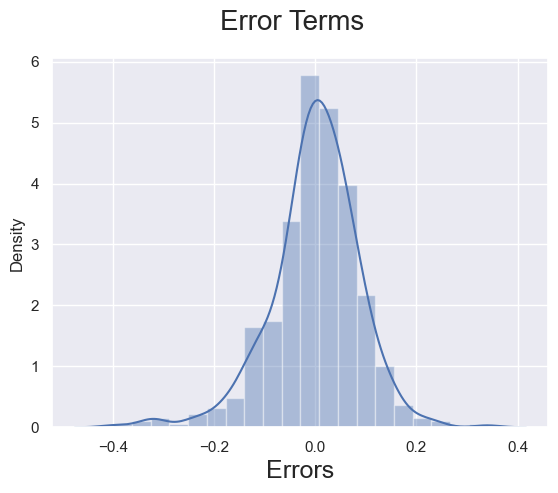

In [108]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

Making predections

In [109]:
# We have already scaled our test set so no need to do it again.
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,aug,dec,feb,...,misty,spring,summer,winter,mon,sat,sun,thu,tue,wed
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,1,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,0,0,...,0,0,1,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,0,...,1,0,0,1,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,1,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [110]:
# drop const
X_train_rfe_1 = X_train_rfe_1.drop(["const"], axis=1)

In [111]:
# create X_test_rfe_1 dataframe by dropping variables from X_test
X_test_rfe_1 = X_test[X_train_rfe_1.columns]

# Add a constant variable
X_test_rfe_1 = sm.add_constant(X_test_rfe_1)

In [112]:
X_train_rfe_1.columns

Index(['year', 'workingday', 'temp', 'humidity', 'windspeed', 'jul', 'sep',
       'light_snow_rain', 'misty', 'spring', 'summer', 'winter', 'sat', 'sun'],
      dtype='object')

In [113]:
# Making predections
y_pred_rfe = lr_rfe_1.predict(X_test_rfe_1)


#### R2 score for RFE

In [114]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_pred_rfe)

0.8175945716770194

## Model Evaluation

Text(0, 0.5, 'y_pred')

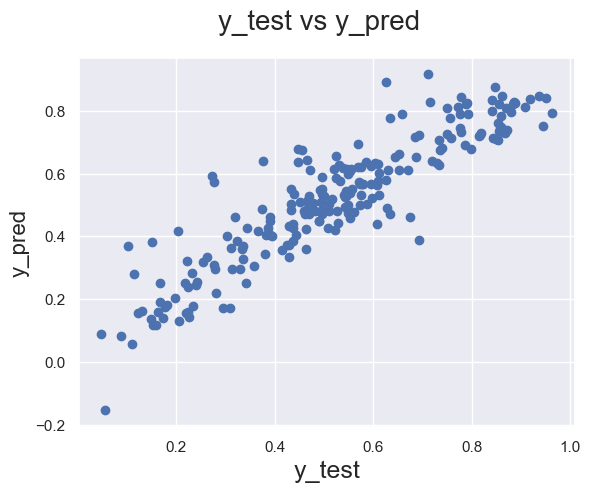

In [115]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_rfe)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      